In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False


os.getcwd()

'd:\\Desktop\\bysj\\bysj\\dataset'

In [2]:
train_dir, val_dir = "./train-50", "./val-50"

train_len: 6927, val_len: 1418 sim:8345


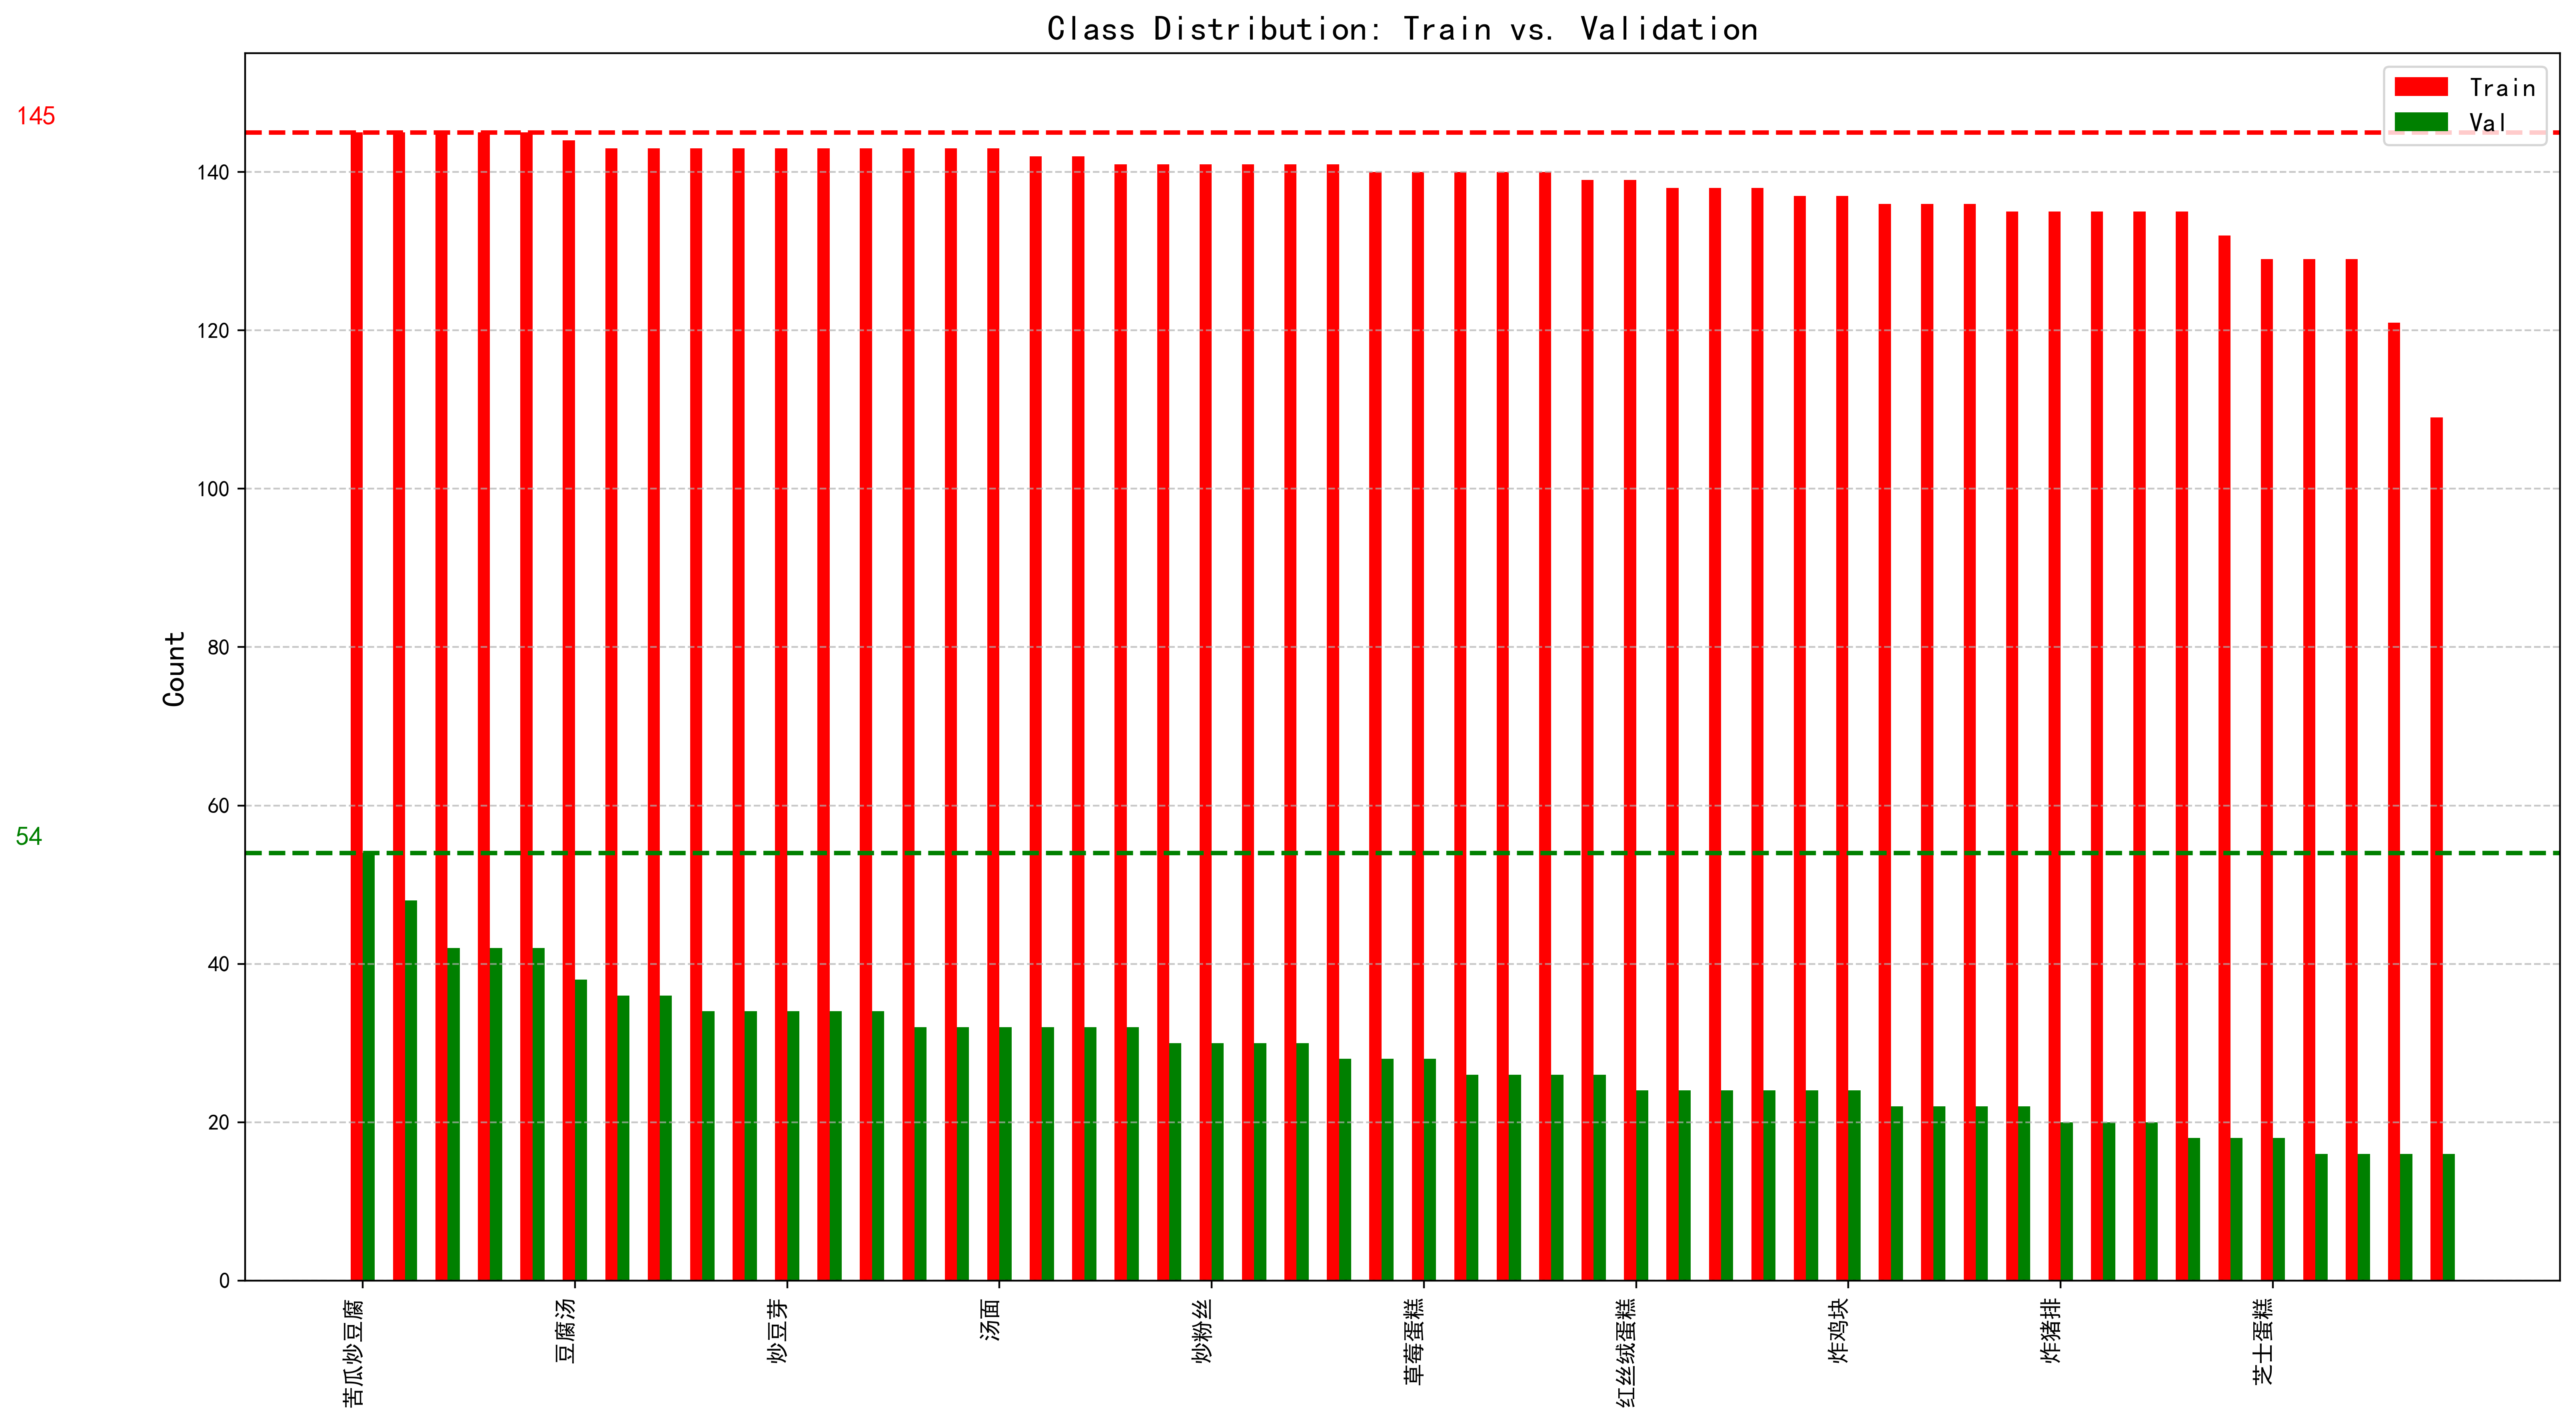

In [3]:
train_len = len(os.listdir(train_dir))
val_len = len(os.listdir(val_dir))
print(f"train_len: {train_len}, val_len: {val_len} sim:{train_len+val_len}")

train_df = pd.DataFrame({"file_name": [i for i in os.listdir(train_dir)]})
train_df["class"] = train_df["file_name"].apply(lambda x: x.split("-")[1])
val_df = pd.DataFrame({"file_name": [i for i in os.listdir(val_dir)]})
val_df["class"] = val_df["file_name"].apply(lambda x: x.split("-")[1])





food_info = json.load(open("../src/food-info-256.json", "r", encoding="utf-8"))
mapper = {k: v["chn"] for k,v in food_info.items()}

all_classes = train_df["class"].value_counts().index.values

x = np.linspace(0, len(all_classes) * 1.2, len(all_classes))
y1 = train_df["class"].value_counts().values
y2 = val_df["class"].value_counts().values

# 设置图表大小和分辨率
plt.figure(figsize=(16, 9), dpi=400)

# 设置条形图宽度
bar_width = 0.35

# 绘制条形图
plt.bar(x - bar_width/2, y1, width=bar_width, label="Train", color='r')
plt.bar(x + bar_width/2, y2, width=bar_width, label="Val", color='g')

# 添加水平线，并显示其值
max_y1 = y1.max()
max_y2 = y2.max()

plt.axhline(y=max_y1, color='r', linestyle='--', linewidth=2)
plt.axhline(y=max_y2, color='g', linestyle='--', linewidth=2)

# 在水平线旁显示对应的值
text_x = -10
plt.text(text_x, max_y1+2, f'{max_y1}', color='r', va='center', ha='left', fontsize=12, fontweight='bold')
plt.text(text_x, max_y2+2, f'{max_y2}', color='g', va='center', ha='left', fontsize=12, fontweight='bold')

# 设置x轴标签和旋转角度
selected_indices = np.arange(0, len(all_classes), 5)
plt.xticks(x[selected_indices], [mapper[i] for i in all_classes[selected_indices]], ha='right', rotation=90)

plt.ylim(0, max(max_y1, max_y2) + 10)
plt.title("Class Distribution: Train vs. Validation", fontsize=16, fontweight='bold')
plt.ylabel("Count", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [4]:
y1.min(), y2.min()

(np.int64(109), np.int64(16))